# Demo
------
Live demo from research meeting 2022-3-20

## Imports

In [1]:
import numpy as np
from lightning import Lightning

import matplotlib.pyplot as plt

plt.style.use('ebm-dejavu') # Comment me out if running locally

%matplotlib inline

## Define Lightning object
All that is required is a set of filters (same labels as IDL Lightning) and a redshift.

In [2]:
filter_labels = ['SDSS_u', 'SDSS_g', 'SDSS_r', 'SDSS_i', 'SDSS_z', 'NIRCam_F444W']

l = Lightning(filter_labels, 
              redshift=0.0, 
              dust_emission=True, 
              print_setup_time=True)

0.107 s elapsed in _get_filters
0.005 s elapsed in _get_wave_obs
0.725 s elapsed in stellar model setup
0.000 s elapsed in dust attenuation model setup
2.637 s elapsed in dust emission model setup
3.474 s elapsed total


/Users/Erik/Documents/Research/lightning/plightning/lightning/get_filters.py:61: RuntimeWarning: invalid value encountered in true_divide
  transm_norm_interp = transm_interp / trapz(transm_interp, wave_grid)


The Lightning object knows what its model components and parameters are:

In [3]:
l.print_params(verbose=True)


Piecewise-Constant
Parameter  Lo  Hi              Description
--------- --- --- ------------------------
    psi_1 0.0 inf SFR in stellar age bin 1
    psi_2 0.0 inf SFR in stellar age bin 2
    psi_3 0.0 inf SFR in stellar age bin 3
    psi_4 0.0 inf SFR in stellar age bin 4
    psi_5 0.0 inf SFR in stellar age bin 5

Modified-Calzetti
      Parameter   Lo  Hi                                              Description
--------------- ---- --- --------------------------------------------------------
mcalz_tauV_diff  0.0 inf                         Optical depth of the diffuse ISM
    mcalz_delta -inf inf      Deviation from the Calzetti+2000 UV power law slope
  mcalz_tauV_BC  0.0 inf Optical depth of the birth cloud in star forming regions

DL07-Dust
      Parameter     Lo       Hi                                                             Description
--------------- ------ -------- -----------------------------------------------------------------------
dl07_dust_alpha  -10.0      4.0

## Evaluate the model

At present, the Lightning object (and every model object) has two methods, `get_model_lnu` and `get_model_lnu_hires` that produce the model $L_\nu$ convolved with the filters and at full resolution, respectively.

In [4]:
params = np.array([1,1,1,1,1,
                   0.3, 0, 0,
                   2, 1, 3e5, 0.01, 0.025])

lnu_lores_red, lnu_lores_unred = l.get_model_lnu(params, stepwise=False)
lnu_hires_red, lnu_hires_unred = l.get_model_lnu_hires(params, stepwise=False)

Text(0, 0.5, '$\\nu L_{\\nu}\\ [\\rm L_{\\odot}]$')

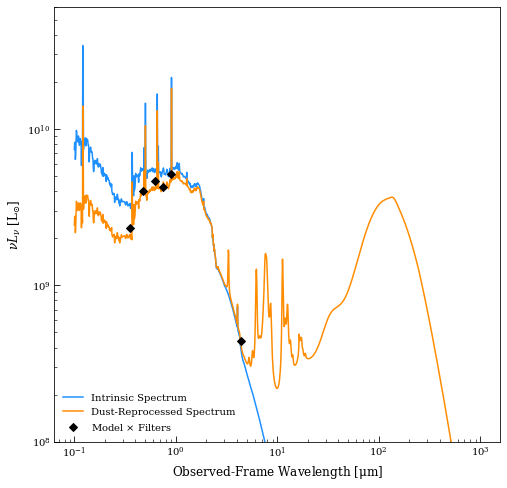

In [5]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(l.wave_grid_obs, l.nu_grid_obs * lnu_hires_unred, color='dodgerblue', label='Intrinsic Spectrum')
ax.plot(l.wave_grid_obs, l.nu_grid_obs * lnu_hires_red, color='darkorange', label='Dust-Reprocessed Spectrum')

ax.plot(l.wave_obs, l.nu_obs * lnu_lores_red, color='k', markerfacecolor='k', marker='D', linestyle='', label=r'Model $\times$ Filters')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e8,)
ax.legend(loc='lower left')

ax.set_xlabel(r'Observed-Frame Wavelength [$\rm \mu m$]')
ax.set_ylabel(r'$\nu L_{\nu}\ [\rm L_{\odot}]$')